In [1]:
using DataFrames, MLJ, CairoMakie

In [2]:
X, y = @load_boston;
X = DataFrame(X)
y = Vector(y);

In [4]:
[(m.name) for m in models(matching(X,y)) if m.is_pure_julia == true && m.package_name == "MLJLinearModels"]

8-element Vector{String}:
 "ElasticNetRegressor"
 "HuberRegressor"
 "LADRegressor"
 "LassoRegressor"
 "LinearRegressor"
 "QuantileRegressor"
 "RidgeRegressor"
 "RobustRegressor"

In [5]:
model = @load LassoRegressor pkg=MLJLinearModels
pipe = @pipeline Standardizer model

import MLJLinearModels ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\julio\.julia\packages\MLJModels\GKDnU\src\loading.jl:168


Pipeline276(
    standardizer = Standardizer(
            features = Symbol[],
            ignore = false,
            ordered_factor = false,
            count = false),
    lasso_regressor = LassoRegressor(
            lambda = 1.0,
            fit_intercept = true,
            penalize_intercept = false,
            solver = nothing))

In [56]:
r = range(pipe, :(lasso_regressor.lambda), lower=1, upper=100, scale=:linear)
tuned_model = TunedModel(model=pipe,
                         range=r,
                         resampling=CV(nfolds=10),
                         tuning=Grid(resolution=50),
                         measure=rms)
m = machine(tuned_model, X, y) |> fit!

┌ Info: Training Machine{DeterministicTunedModel{Grid,…},…}.
└ @ MLJBase C:\Users\julio\.julia\packages\MLJBase\QXObv\src\machines.jl:403
┌ Info: Attempting to evaluate 50 models.
└ @ MLJTuning C:\Users\julio\.julia\packages\MLJTuning\bjRHJ\src\tuned_models.jl:680
Evaluating over 50 metamodels:   4%[=>                       ]  ETA: 0:00:04

Evaluating over 50 metamodels:   6%[=>                       ]  ETA: 0:00:05

Evaluating over 50 metamodels:   8%[==>                      ]  ETA: 0:00:04

Evaluating over 50 metamodels:  10%[==>                      ]  ETA: 0:00:04

Evaluating over 50 metamodels:  12%[===>                     ]  ETA: 0:00:04

Evaluating over 50 metamodels:  14%[===>                     ]  ETA: 0:00:04

Evaluating over 50 metamodels:  16%[====>                    ]  ETA: 0:00:04

Evaluating over 50 metamodels:  18%[====>                    ]  ETA: 0:00:04

Evaluating over 50 metamodels:  20%[=====>                   ]  ETA: 0:00:03

Evaluating over 50 metamodels:  22%[=====>                   ]  ETA: 0:00:03

Evaluating over 50 metamodels:  24%[======>                  ]  ETA: 0:00:03

Evaluating over 50 metamodels:  26%[======>                  ]  ETA: 0:00:04

Evaluating over 50 metamodels:  28%[=======>                 ]  ETA: 0:00:04

Evaluating over 50 metamodels:  30%[=======>                 ]  ETA: 0:00:04

Evaluating over 50 metamodels:  32%[========>                ]  ETA: 0:00:04

Evaluating over 50 metamodels:  34%[========>                ]  ETA: 0:00:04

Evaluating over 50 metamodels:  36%[=========>               ]  ETA: 0:00:04

Evaluating over 50 metamodels:  38%[=========>               ]  ETA: 0:00:03

Evaluating over 50 metamodels:  40%[==========>              ]  ETA: 0:00:03

Evaluating over 50 metamodels:  42%[==========>              ]  ETA: 0:00:03

Evaluating over 50 metamodels:  44%[===========>             ]  ETA: 0:00:03

Evaluating over 50 metamodels:  46%[===========>             ]  ETA: 0:00:03

Evaluating over 50 metamodels:  48%[============>            ]  ETA: 0:00:03

Evaluating over 50 metamodels:  50%[============>            ]  ETA: 0:00:03

Evaluating over 50 metamodels:  52%[=============>           ]  ETA: 0:00:03

Evaluating over 50 metamodels:  54%[=============>           ]  ETA: 0:00:03

Evaluating over 50 metamodels:  56%[==============>          ]  ETA: 0:00:02

Evaluating over 50 metamodels:  58%[==============>          ]  ETA: 0:00:02

Evaluating over 50 metamodels:  60%[===============>         ]  ETA: 0:00:02

Evaluating over 50 metamodels:  62%[===============>         ]  ETA: 0:00:02

Evaluating over 50 metamodels:  64%[================>        ]  ETA: 0:00:02

Evaluating over 50 metamodels:  66%[================>        ]  ETA: 0:00:02

Evaluating over 50 metamodels:  68%[=================>       ]  ETA: 0:00:02

Evaluating over 50 metamodels:  70%[=================>       ]  ETA: 0:00:02

Evaluating over 50 metamodels:  72%[==================>      ]  ETA: 0:00:02

Evaluating over 50 metamodels:  74%[==================>      ]  ETA: 0:00:01

Evaluating over 50 metamodels:  76%[===================>     ]  ETA: 0:00:01

Evaluating over 50 metamodels:  78%[===================>     ]  ETA: 0:00:01

Evaluating over 50 metamodels:  80%[====================>    ]  ETA: 0:00:01

Evaluating over 50 metamodels:  82%[====================>    ]  ETA: 0:00:01

Evaluating over 50 metamodels:  84%[=====================>   ]  ETA: 0:00:01

Evaluating over 50 metamodels:  86%[=====================>   ]  ETA: 0:00:01

Evaluating over 50 metamodels:  88%[======================>  ]  ETA: 0:00:01

Evaluating over 50 metamodels:  90%[======================>  ]  ETA: 0:00:01

Evaluating over 50 metamodels:  92%[=======================> ]  ETA: 0:00:00

Evaluating over 50 metamodels:  94%[=======================> ]  ETA: 0:00:00

Evaluating over 50 metamodels:  96%[========================>]  ETA: 0:00:00

Evaluating over 50 metamodels:  98%[========================>]  ETA: 0:00:00

Evaluating over 50 metamodels: 100%[=========================] Time: 0:00:05


Machine{DeterministicTunedModel{Grid,…},…} trained 1 time; caches data
  args: 
    1:	Source @509 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @000 ⏎ `AbstractVector{Continuous}`


In [57]:
fp = fitted_params(m);

In [58]:
fp.best_fitted_params.lasso_regressor.coefs

12-element Vector{Pair{Symbol, Float64}}:
    :Crim => -0.6559937961265745
      :Zn => 0.6810255394887518
   :Indus => -0.0
     :NOx => -1.4376663037242658
      :Rm => 2.8729765143048525
     :Age => -0.0
     :Dis => -2.4350929700449178
     :Rad => 1.2135277731183949
     :Tax => -0.8974319498316673
 :PTRatio => -1.9789420812588214
   :Black => 0.7964996102945452
   :LStat => -3.7686372650664226

In [59]:
fp.best_fitted_params.lasso_regressor.intercept

22.532803554624437

In [60]:
m.report.best_history_entry

(model = Pipeline276,
 measure = [RootMeanSquaredError()],
 measurement = [5.834659388790447],
 per_fold = [[2.893710388804024, 3.589374646897607, 3.149555333238353, 6.0836055491003975, 5.090868846634175, 4.619431153626045, 3.1464966835141603, 13.016728693910228, 5.995194058408331, 3.116290667257937]],)

In [61]:
m.report.best_model

Pipeline276(
    standardizer = Standardizer(
            features = Symbol[],
            ignore = false,
            ordered_factor = false,
            count = false),
    lasso_regressor = LassoRegressor(
            lambda = 53.53061224489796,
            fit_intercept = true,
            penalize_intercept = false,
            solver = nothing))

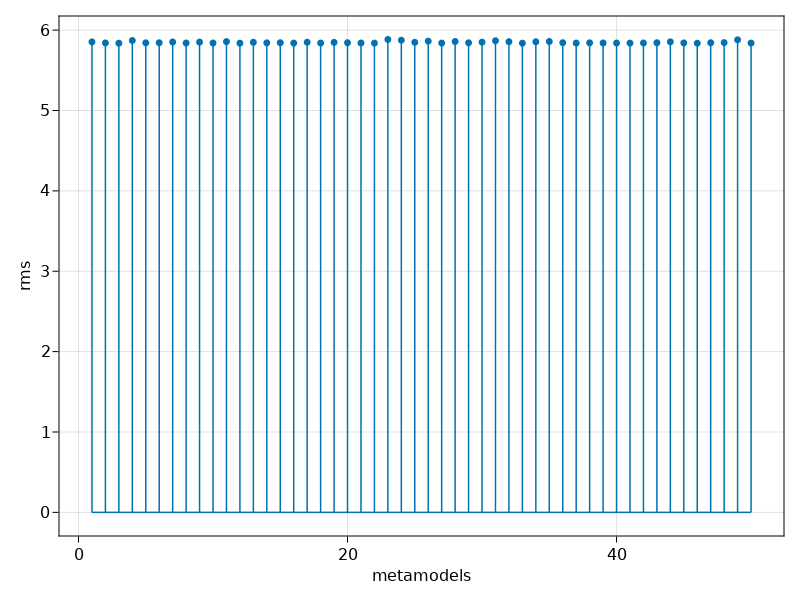

In [62]:
f = Figure()
ax = Axis(f[1,1])
ax.xlabel = "metamodels"
ax.ylabel = "rms"
stem!(ax, m.report.plotting.measurements)
f